In [1]:
import os
import gc
import numpy as np
import matplotlib.pyplot as plt
import drjit as dr
import mitsuba as mi
from scipy.ndimage import gaussian_filter
import torch
mi.set_variant('cuda_ad_rgb')

In [2]:
from utils.gen_utils import load_scene, transform_scene, scene_to_float

In [700]:
scene = load_scene("living-room", "bird")
scene = transform_scene(scene, "bird", 0.7, -0.6, 0)
image = mi.render(scene, spp=512)
bitmap = mi.Bitmap(image).convert(srgb_gamma=True)
bitmap

Bitmap[
  pixel_format = rgb,
  component_format = float32,
  size = [512, 512],
  srgb_gamma = 1,
  struct = Struct<12>[
    float32 R; // @0, gamma, premultiplied alpha
    float32 G; // @4, gamma, premultiplied alpha
    float32 B; // @8, gamma, premultiplied alpha
  ],
  data = [ 3 MiB of image data ]
]

In [28]:
import pandas as pd
model_dir = "/home/wcp27/project/halluc_prog_MAPnet/images/baseline"
files = os.listdir(model_dir)
files = sorted([f for f in files if f.endswith(".png")])
images = pd.read_csv("/".join([model_dir, "labels.csv"]))["image"].to_list()
len(set(files) ^ set(images))

0

In [19]:
sorted([f.split("_")[-1].replace(".png", "") for f in list(set(files) ^ set(images))])[200]

'4814'

In [1]:
import os
import pandas as pd

proj_dir = "/home/wcp27/project/halluc_prog_MAPnet"
bin_dir = "/".join([proj_dir, "bin"])
lib_dir = "/".join([proj_dir, "lib"])

df_models = pd.read_csv("/".join([lib_dir, "models.csv"]))

/tmp/ipykernel_678708/2981267950.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [17]:
df_models

,model,family,age,expectation,distortion,dval,progression,confidence
0,A1_CL050_00,expectation,10000,1,clean,0.05,0,0
1,A1_CL050_55,expectation,10000,1,clean,0.05,0,55
2,A1_CL050_85,expectation,10000,1,clean,0.05,0,85
3,A0_CL050_00,none,10000,0,clean,0.05,0,0
4,A1_NO151_00,noconf,10000,1,noisy,0.15,1,0
...,...,...,...,...,...,...,...,...
83,A0_MI040_00,neurodeg,10000,0,mixed,4.00,0,0
84,A1_MI080_00,noconf,10000,1,mixed,8.00,0,0
85,A1_MI080_55,hiconf,10000,1,mixed,8.00,0,55
86,A1_MI080_85,lowconf,10000,1,mixed,8.00,0,85


In [2]:
df_models = df_models[df_models["confidence"]==0]

In [3]:
df_models

,model,family,age,expectation,distortion,dval,progression,confidence
0,A1_CL050_00,expectation,10000,1,clean,0.05,0,0
3,A0_CL050_00,none,10000,0,clean,0.05,0,0
4,A1_NO151_00,noconf,10000,1,noisy,0.15,1,0
7,A0_NO151_00,neurodeg,10000,0,noisy,0.15,1,0
8,A1_NO250_00,noconf,10000,1,noisy,0.25,0,0
11,A0_NO250_00,neurodeg,10000,0,noisy,0.25,0,0
12,A1_NO450_00,noconf,10000,1,noisy,0.45,0,0
15,A0_NO450_00,neurodeg,10000,0,noisy,0.45,0,0
16,A1_BL021_00,noconf,10000,1,blurred,2.00,1,0
19,A0_BL021_00,neurodeg,10000,0,blurred,2.00,1,0


In [4]:
for i, row in df_models.iterrows():
    # Make directory
    os.makedirs("/".join([lib_dir, row["model"]]))
    
    # Create files
    ## n_train.txt
    n_train = open("/".join([lib_dir, row["model"], "n_train.txt"]), "w")
    n_train.write("\n".join(["45000", "11250", "11250", "11250", "11250"]))
    n_train.close()
    
    ## lr.txt
    lr = open("/".join([lib_dir, row["model"], "lr.txt"]), "w")
    lr.write("\n".join(["0.0001", "0.0001", "0.0001", "0.0001", "0.0001"]))
    lr.close()
    
    ## n_epoch.txt
    n_epoch = open("/".join([lib_dir, row["model"], "n_epoch.txt"]), "w")
    n_epoch.write("\n".join(["75", "75", "75", "75", "75"]))
    n_epoch.close()
    
    ## dval.txt
    dval = open("/".join([lib_dir, row["model"], "dval.txt"]), "w")
    if row["progression"] == 1:
        if row["dval"] == 0.15:
            dval_lst = ["0.15", "0.25", "0.35", "0.45", "0.55"]
        else:
            dval_lst = ["2.0", "4.0", "6.0", "8.0", "10.0"]
    else:
        dval_lst = [str(row["dval"]) for i in range(5)]
    dval.write("\n".join(dval_lst))
    dval.close()
    
    ## conf.txt
    conf = open("/".join([lib_dir, row["model"], "conf.txt"]), "w")
    conf_lst = [str(row["confidence"]) for i in range(5)]
    conf.write("\n".join(conf_lst))
    conf.close()
    
    # Write Slurm
    sl = open("/".join([bin_dir, "run_"+row["model"]+".sh"]), "w")
    sl.write("\n".join(["#!/bin/bash", "#SBATCH --job-name="+row["model"], 
                        "#SBATCH --partition=gpu", "#SBATCH --cpus-per-task=1", 
                        "#SBATCH --mem=80G", "#SBATCH --gpus=1", "#SBATCH --time=1-00:00:00", 
                        "module load miniconda CUDA/12.1.1 cuDNN/8.9.2.26-CUDA-12.1.1 Julia/1.9.3-linux-x86_64",
                        "conda activate generative", 
                        " ".join(["./model.sh", row["model"], "0", "4", '"[10000, 10000, 10000, 10000, 10000, 10000]"', row["distortion"], str(row["expectation"])])]))
    sl.close()
    

In [35]:
test_type="mixed"
if test_type in ("color", "edge", "complex", "cedge", "mixed"):
    print("Yay")
else:
    print("Boo")

Yay


In [14]:
import pandas as pd
model = "A1_NO151_00_1"
proj_dir = "/home/wcp27/project/halluc_prog_MAPnet"
img_dir = "/".join([proj_dir, "images"])
labels = pd.read_csv("/".join([img_dir, model, "labels.csv"]))
labels = labels.iloc[:9000, :]
labels.to_csv("/".join([img_dir, model, "labels.csv"]), index=False)

In [42]:
import pandas as pd
proj_dir = "/home/wcp27/project/halluc_prog_MAPnet"
img_dir = "/".join([proj_dir, "images"])
df_pred = pd.read_csv("/".join([img_dir, "A1_ED040_00_3", "A1_ED040_00_3_edge_pred.csv"]))

In [26]:
tmp_agent = pd.read_csv("/".join([img_dir, "A1_CL050_00_3", "_".join(["A1_CL050_00_3", "clean","agent_error.csv"])]))

In [33]:
for i in range(5):
    print(i)
    tmp_agent = pd.read_csv("/".join([img_dir, "A1_ED040_00_"+str(i), "_".join(["A1_ED040_00_"+str(i), "edge","agent_error.csv"])]))
    agent_df = tmp_agent.iloc[0:9, :]
    print(agent_df[agent_df["Count"]>0]["Error"].to_list())

0
['none.bird', 'none.baby']
1
['none.cap', 'none.bird', 'none.baby']
2
['none.cap', 'none.bird', 'none.cat', 'none.baby']
3
['none.bird', 'none.baby']
4
['none.cap', 'none.bird', 'none.cat', 'none.baby']


array([[<Axes: title={'center': 'ConfAgent'}>]], dtype=object)

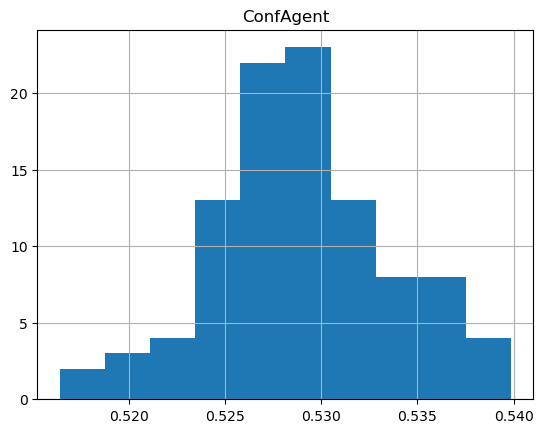

In [43]:
df_pred[(df_pred["Agent"] == "none") & (df_pred["PredAgent"] == "baby")].hist(column="ConfAgent")

array([[<Axes: title={'center': 'ConfAgent'}>]], dtype=object)

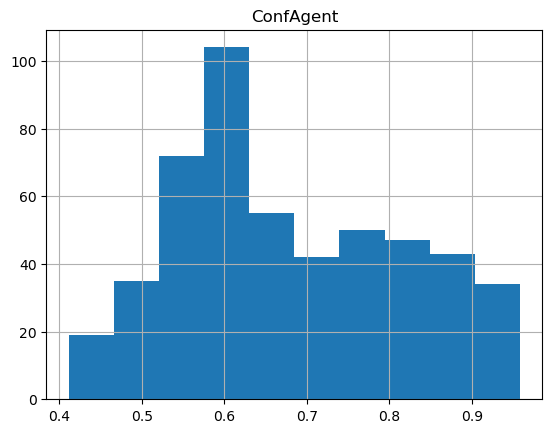

In [44]:
df_pred[(df_pred["Agent"] == "baby") & (df_pred["PredAgent"] == "baby")].hist(column="ConfAgent")

In [16]:
agent_df = tmp_agent.iloc[0:9, :]
agent_df[agent_df["Count"]>0]

,Error,Count


In [17]:
agent_df

,Error,Count
0,none.cap,0
1,none.camera,0
2,none.boot,0
3,none.bird,0
4,none.cat,0
5,none.dog,0
6,none.baby,0
7,none.woman,0
8,none.man,0


array([[<Axes: title={'center': 'ConfAgent'}>]], dtype=object)

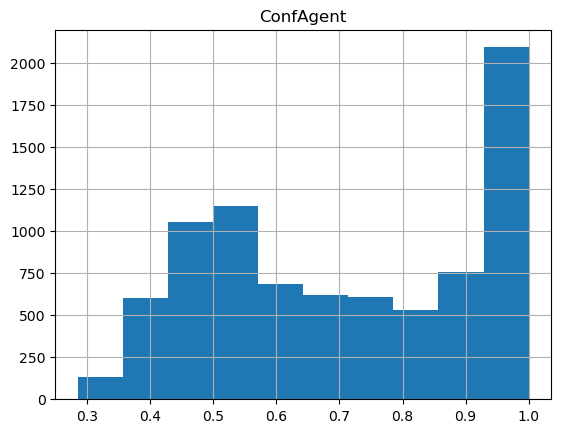

In [4]:
df_pred[df_pred["Agent"] == df_pred["PredAgent"]].hist(column="ConfAgent")

array([[<Axes: title={'center': 'ConfAgent'}>]], dtype=object)

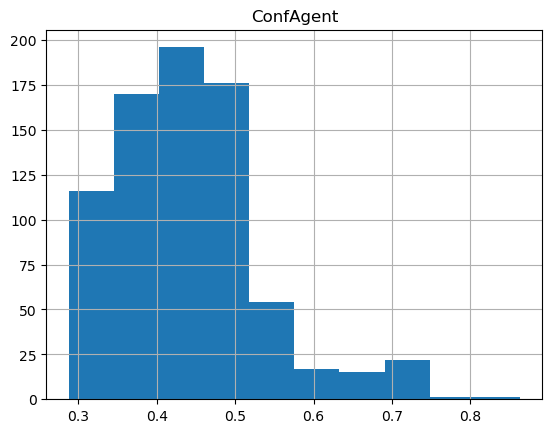

In [5]:
df_pred[df_pred["Agent"] != df_pred["PredAgent"]].hist(column="ConfAgent")

array([[<Axes: title={'center': 'ConfAgent'}>]], dtype=object)

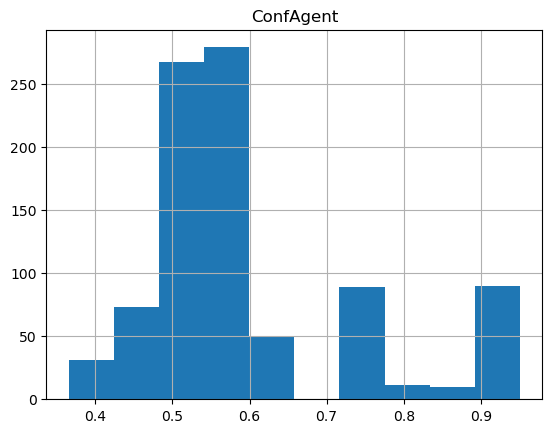

In [6]:
df_pred[df_pred["Agent"] == "none"].hist(column="ConfAgent")

array([[<Axes: title={'center': 'ConfAgent'}>]], dtype=object)

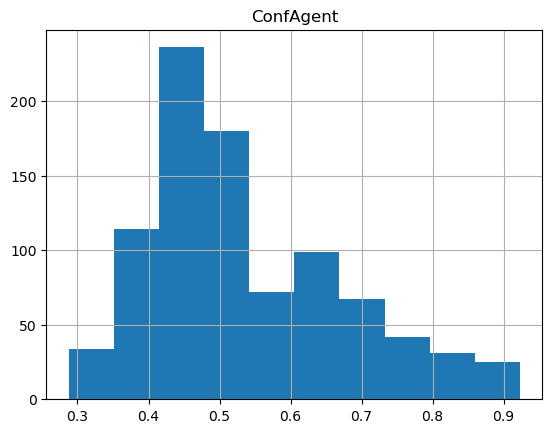

In [7]:
df_pred[df_pred["Agent"] == "cap"].hist(column="ConfAgent")

array([[<Axes: title={'center': 'ConfAgent'}>]], dtype=object)

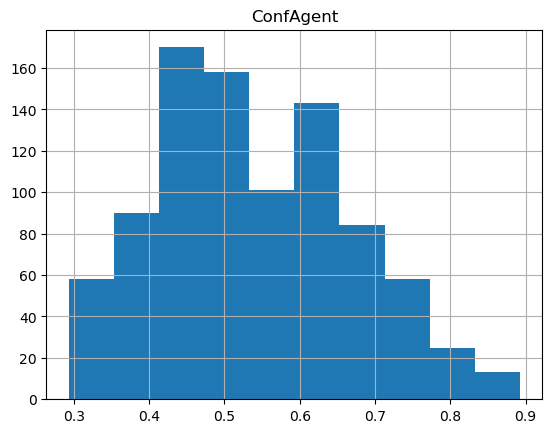

In [8]:
df_pred[df_pred["Agent"] == "camera"].hist(column="ConfAgent")

array([[<Axes: title={'center': 'ConfAgent'}>]], dtype=object)

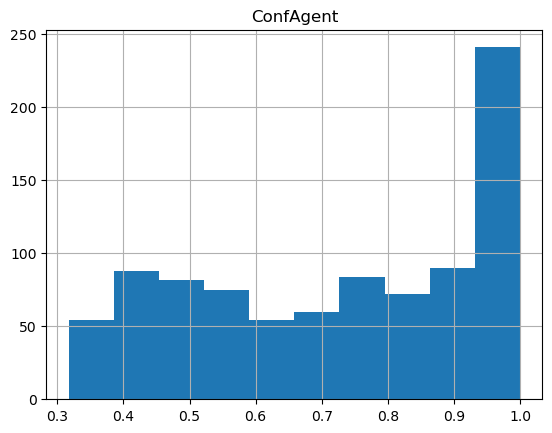

In [9]:
df_pred[df_pred["Agent"] == "boot"].hist(column="ConfAgent")

array([[<Axes: title={'center': 'ConfAgent'}>]], dtype=object)

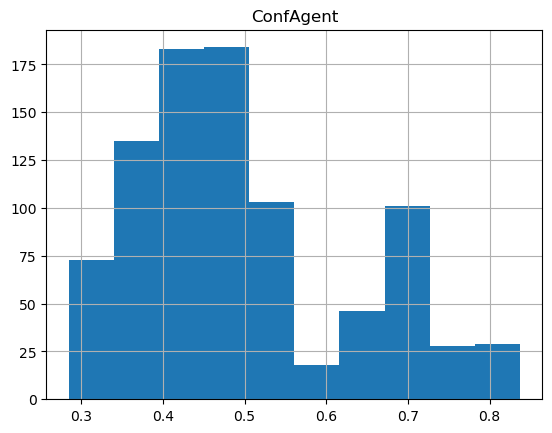

In [10]:
df_pred[df_pred["Agent"] == "bird"].hist(column="ConfAgent")

array([[<Axes: title={'center': 'ConfAgent'}>]], dtype=object)

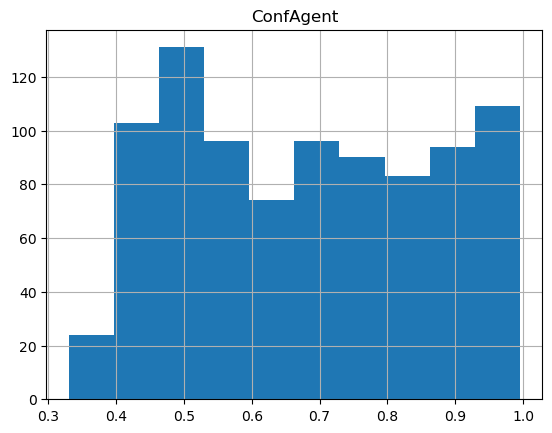

In [11]:
df_pred[df_pred["Agent"] == "cat"].hist(column="ConfAgent")

array([[<Axes: title={'center': 'ConfAgent'}>]], dtype=object)

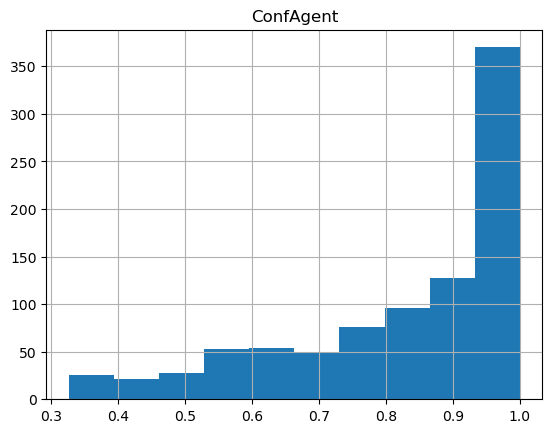

In [12]:
df_pred[df_pred["Agent"] == "dog"].hist(column="ConfAgent")

array([[<Axes: title={'center': 'ConfAgent'}>]], dtype=object)

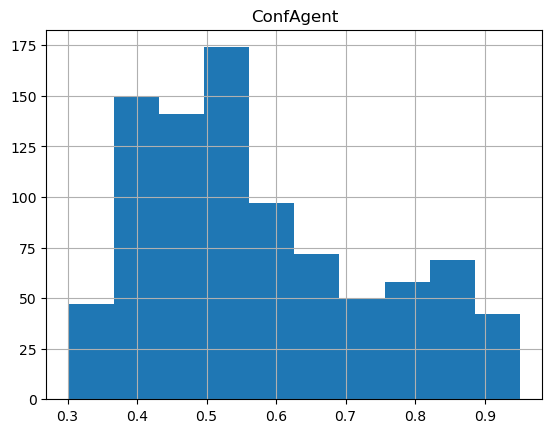

In [13]:
df_pred[df_pred["Agent"] == "baby"].hist(column="ConfAgent")

array([[<Axes: title={'center': 'ConfAgent'}>]], dtype=object)

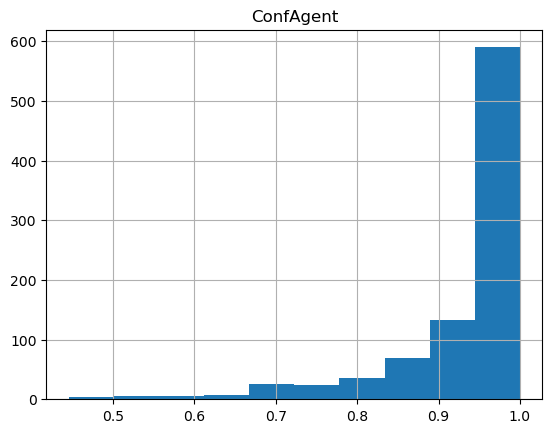

In [14]:
df_pred[df_pred["Agent"] == "woman"].hist(column="ConfAgent")

array([[<Axes: title={'center': 'ConfAgent'}>]], dtype=object)

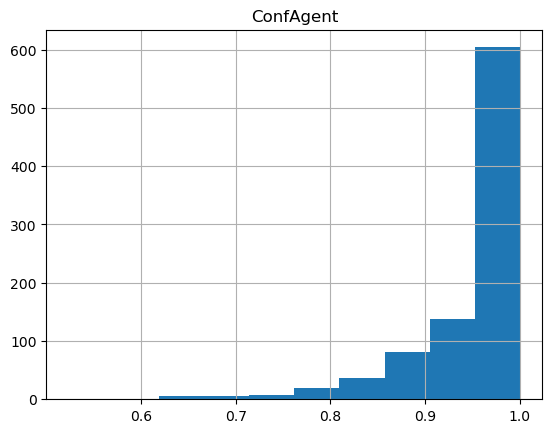

In [15]:
df_pred[df_pred["Agent"] == "man"].hist(column="ConfAgent")

In [11]:
import os
import argparse
import warnings
warnings.simplefilter(action='ignore', category=DeprecationWarning) # pandas warning pyarrow
import pandas as pd
import numpy as np
import random
from PIL import Image
import torch
import torch.nn as nn
import torch.utils.data as data_utils
import torchvision.transforms.functional as TF

nmodel = "A1_NO151_00_1"
test_type = "noisy"
dval=0.15

# Set Directories
proj_dir = "/home/wcp27/project/halluc_prog_MAPnet"
lib_dir = "/".join([proj_dir, "lib"])
data_dir = "/".join([proj_dir, "images", nmodel])
test_dir = "/".join([proj_dir, "images", "test"])

# Test network
print("------------------------------")
print("TESTING NETWORK")
print("Model:", nmodel)
print("Testing:", test_type)

# Load filse
test_file = "/".join([data_dir, "labels.csv"])

# Load images and labels
print("Loading data")
test_df = pd.read_csv(test_file)

for i in test_df["image"]:
    print(i)
    tmp = Image.open('/'.join([data_dir, i])).resize((224, 224), resample=Image.Resampling.LANCZOS)

------------------------------
TESTING NETWORK
Model: A1_NO151_00_1
Testing: noisy
Loading data
dining-room_cat_1.png
staircase_cap_2.png
bedroom_baby_3.png
study_dog_4.png
bathroom_man_5.png
tea-room_woman_6.png
bathroom_woman_7.png
study_dog_8.png
study_man_9.png
tea-room_man_10.png
study_woman_11.png
study_bird_12.png
bedroom_cap_13.png
staircase_boot_14.png
staircase_dog_15.png
staircase_baby_16.png
staircase_cat_17.png
living-room_woman_18.png
living-room_bird_19.png
grey-white-room_cap_20.png
staircase_boot_21.png
staircase_none_22.png
bedroom_man_23.png
bathroom_cat_24.png
living-room_bird_25.png
tea-room_cat_26.png
study_none_27.png
staircase_boot_28.png
kitchen_dog_29.png
living-room_baby_30.png
bedroom_man_31.png
kitchen_boot_32.png
tea-room_camera_33.png
bathroom_boot_34.png
study_dog_35.png
bathroom_bird_36.png
study_cap_37.png
study_cap_38.png
staircase_boot_39.png
dining-room_camera_40.png
bedroom_man_41.png
bedroom_bird_42.png
kitchen_baby_43.png
living-room_cap_44.png
b

FileNotFoundError: [Errno 2] No such file or directory: '/home/wcp27/project/halluc_prog_MAPnet/images/A1_NO151_00_1/grey-white-room_camera_7395.png'

In [ ]:
python utils/gen_images.py --model test/noisy_0.25 --row 2019 --test_type noisy --dval 0.25 --spp 512